# Confidence-aware belief propagation for multimodal data
This notebook runs a demonstration of the belief propagtion (BP) framework initially created for post-disaster damage assessment by Luke Cullen at the University of Cambridge

In [1]:
# Install uncommon package and imprt others
try: import rioxarray
except: 
    %pip install rioxarray

import interactions as it
defaults = it.get_defaults()

Box(children=(Label(value='Please select default inputs: '), Dropdown(layout=Layout(width='max-content'), opti…

In [3]:
inputs = it.input_parameters(defaults)

HTML(value='<b>Label parameters</b>')

Box(children=(Label(value='Ground truth: Shapefile - '), Text(value='./data/Houston/GroundTruth/2018_IEEE_GRSS…

Box(children=(Label(value='Label column - '), Text(value='class', layout=Layout(width='max-content'), placehol…

Box(children=(Label(value='Label confidence ($P_{other label}$, $P_{class}$)'), FloatRangeSlider(value=(0.0, 1…

HTML(value='<b>Data Parameters</b>')

Box(children=(Label(value='Enter Data Types:'), Combobox(value='Hyperspectral imagery', layout=Layout(width='m…

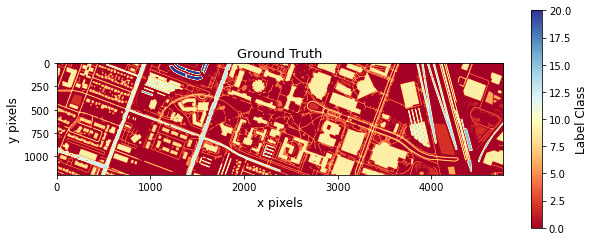

HTML(value='<h3>Model Parameters</h3>')

HTML(value='<b>Node Properties - Sampling occurs if max nodes < input nodes.</b>')

Box(children=(Label(value='Max nodes - '), IntText(value=10000, layout=Layout(width='max-content'), step=1000)…

HTML(value='<b>Edge Properties - Number of neighbours each node is connected to according to input types.</b>'…

Box(children=(IntText(value=2, description='Hyperspectral - ', layout=Layout(width='max-content')), IntText(va…

Box(children=(Label(value='Geographical Edges - '), Checkbox(value=False, indent=False, layout=Layout(width='m…

HTML(value='<b>Class Properties</b>')

HTML(value='Labels - [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]')

Box(children=(Label(value='Remove labels - '), Text(value='0', layout=Layout(width='max-content'), placeholder…

Box(children=(Label(value='Classes for Model - '), Dropdown(index=19, options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11,…

In [4]:
parameters = it.model_parameters(inputs)

In [5]:
imports = it.import_data(parameters)

------Checking Coordinate Systems-------
------Finished Checking Coordinate Systems-------
------Importing Data Files---------


/opt/conda/lib/python3.7/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Imported ./data/Houston/Hyperspectral/20170218_UH_CASI_S4_NAD83.pix
Imported ./data/Houston/LiDAR/UH17_GI3F051.tif
Imported ./data/Houston/HighResolution/houstonmosaic.tif
------Finished Importing Files---------


In [6]:
classified = it.classify_data(imports)

------Data Sampling---------
------Data Classification---------
Clustered classes:[1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0] , original classes:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
------Finished Data Classification---------


Box(children=(Label(value='Balance classes - '), Checkbox(value=True, indent=False)))

Box(children=(Label(value='Loss function limit (logarithmic) - '), FloatLogSlider(value=0.001, max=0.0, min=-1…

In [7]:
output = it.run_bp(classified)

Nodes: 2574, Edges: 18771
It	Loss	Label change

0	5.35337e-01		1035

1	2.03376e-01		179

2	9.59441e-02		18

3	4.64503e-02		4

4	2.22514e-02		1

5	1.06949e-02		0

6	5.11630e-03		0

7	2.44927e-03		0

8	1.17141e-03		0

9	5.60294e-04		0

Time elapsed: 0.7203211784362793 seconds


              precision    recall  f1-score   support

         cl0       0.69      0.60      0.64       409
         cl1       0.65      0.73      0.69       409

    accuracy                           0.67       818
   macro avg       0.67      0.67      0.67       818
weighted avg       0.67      0.67      0.67       818



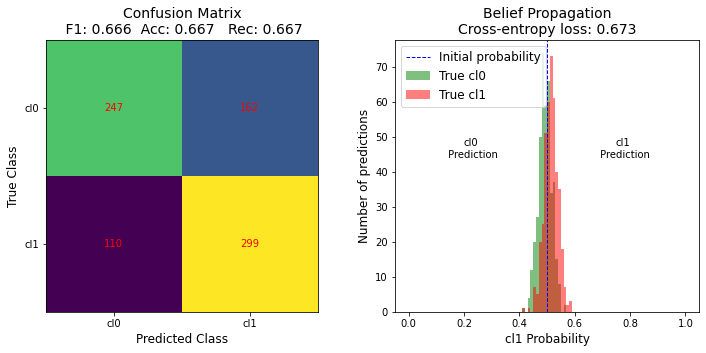

In [8]:
plots = it.evaluate_output(output)

In [28]:
it.save_plot(plots, location='results/performancePlot.png')

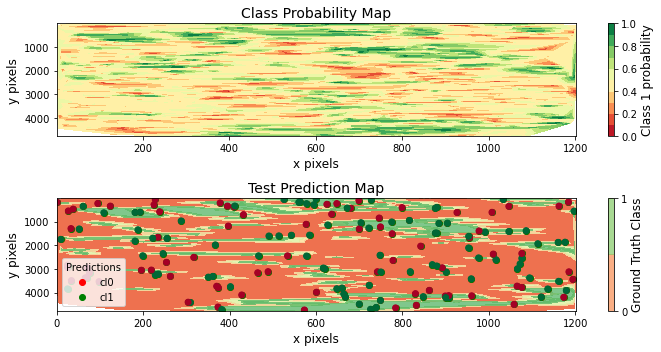

In [9]:
mapping = it.map_result(plots)